In [2]:
import matplotlib.pyplot as plot
import numpy as np
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index
            
            
        

In [3]:
from public import NDsort
def interp(fitness_,x = 3):
    # FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    # FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    # fitness_ = fitness_[FrontValue_1_index]
    
    fitness_[:,0] = 1/fitness_[:,0]
    for i in range(1,x):
        fitness_ = np.vstack((fitness_,fitness_*(40+i)/(x+41)))
    fitness_[:,0] = 1/fitness_[:,0]
    
    FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    fitness_ = fitness_[FrontValue_1_index]
    print(len(fitness_))
    return fitness_

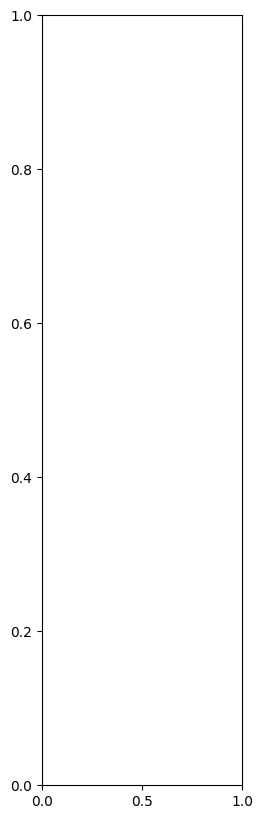

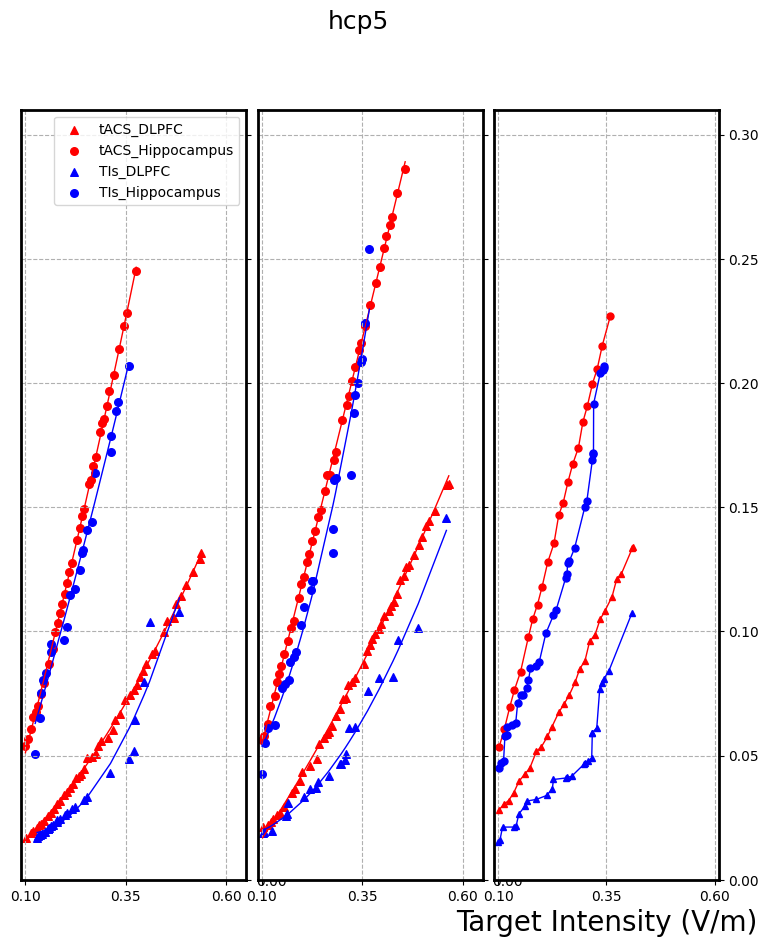

In [3]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp2'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(1,3,figsize=(9, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(131)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(132)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(133)
MODEL = 'hcp5'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")


#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)

#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.plot(1/data[index, 0], data[index, 1],linewidth = 1,markersize = 5,  c='r', marker='^', label='tACS_DLPFC')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
## str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.plot(1/data[index, 0], data[index, 1],linewidth = 1,markersize = 5,  c='r', marker='o', label='tACS_Hippocampus')


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)

 #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.plot(1/data[index, 0], data[index, 1],linewidth = 1,markersize = 5,c='b', marker='^', label='TIs_DLPFC') 


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)

plt.plot(1/data[index, 0], data[index, 1],linewidth = 1,markersize = 5, c='b', marker='o', label='TIs_Hippocampus')
plt.xlabel('Target Intensity (V/m)',fontsize=20)


plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


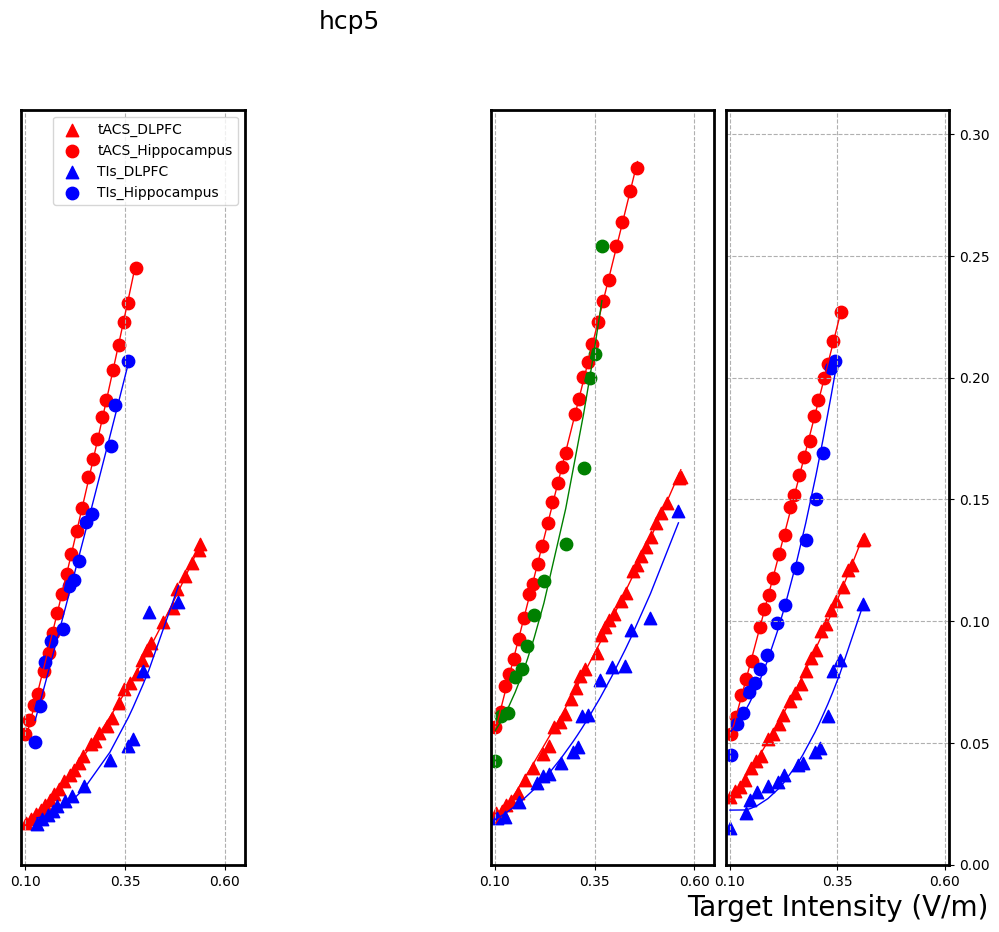

In [11]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01


#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(5,1,figsize=(15, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(152)
MODEL ='hcp2'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
plt.yticks([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(154)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='g', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='g',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
plt.yticks([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(155)
MODEL = 'hcp5'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")


#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()
#不显示y轴


Note: you may need to restart the kernel to use updated packages.


172
183
83
49
211
311
147
108
128
190
23
53
156
226
124
56
164
194
133
70
178
200
156
75
151
191
70
48
187
210
106
59


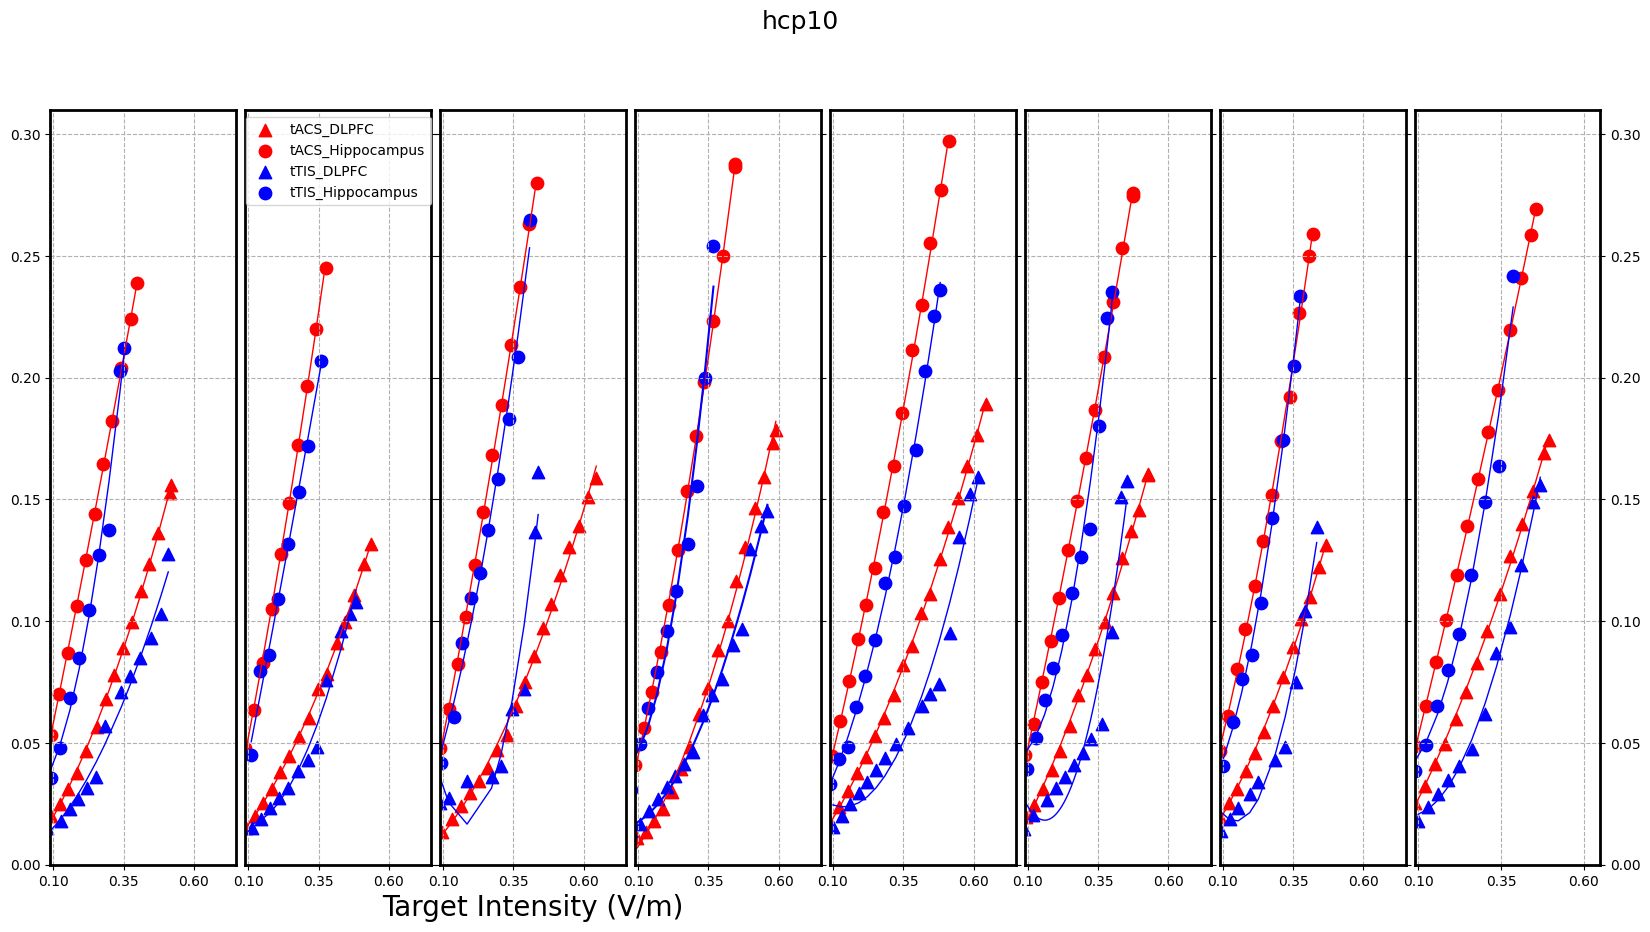

In [13]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np

GAP =0.03
MODEL ='hcp2'

import matplotlib.pyplot as plot
import numpy as np
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index
            
            
        
#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(8,1,figsize=(20,10 ), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(182)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='tTIS_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='tTIS_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='upper center', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(184)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# data = interp(data,10)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.01)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,10)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.03)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,10)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.03)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')



# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# data = interp(data,10)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.01)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(183)
MODEL = 'hcp3'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]


index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp3.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt", "r")
#f2 = open(r"ObjV.csv", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.03)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp3.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.75, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)


plt.subplot(181)
MODEL = 'hcp1'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp1.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})

ax.yaxis.set_ticks_position('left')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.75, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.spines['bottom'].set_linewidth('2.0')


plt.subplot(186)
MODEL ='hcp8'
ax.yaxis.set_ticks_position('left')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.75, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(185)
MODEL ='hcp7'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]

index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
data = data[:-25]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')


plt.subplot(186)
MODEL ='hcp8'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]

index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
temp = np.arange(np.min(1/data[index,0]),np.max(1/data[index,0]),0.001)
plt.plot(temp,p(temp),c='b',linewidth = 1)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='gold',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')



plt.subplot(187)
MODEL ='hcp6'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

#/mnt/zfs-pool/tes/ti/mopso
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/intensity_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')


plt.subplot(188)
MODEL ='hcp10'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

#ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

# # 设置图像的边框粗细程度
t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()
#plt.savefig("result1106.pdf")
#不显示y轴


In [1]:


plt.subplot(121)
MODEL = 'hcp5'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_hcp5.txt")
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp1.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='tTIS_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='tTIS_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})


plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.65, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')
plt.show()

NameError: name 'plt' is not defined

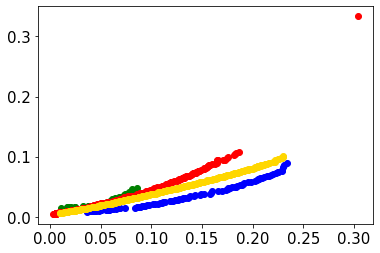

In [21]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/fitness.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

index = np.argsort(1/data[:,0])
data = data[index]

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")

f2 = open(r"/mnt/zfs-pool/tes/result of job 2022-07-28 15h-07m-09s/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
x = np.array(gt_data)
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")

f2 = open(r"/mnt/zfs-pool/tes/result of job 2022-07-28 15h-33m-30s/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
y = np.array(gt_data)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/result of job 2022-07-28 21h-14m-40s/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
x1 = np.array(gt_data)

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/result of job 2022-07-28 21h-15m-24s/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
y1 = np.array(gt_data)

plt.scatter(1/x[:,0],x[:,1],c='g')
plt.scatter(1/y[:,0],y[:,1],c='b')
plt.scatter(1/x1[:,0],x1[:,1],c='r')
plt.scatter(1/y1[:,0],y1[:,1],c='gold')

plt.scatter(0.30363817830216805, 0.33363379311244055,c ='r')
p = np.poly1d(parameter)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

In [51]:
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1102pareto_in_motor_hcp4.txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
hippo_in = np.array(gt_data)


hippo = np.where(abs(hippo_in[0])<0.01,0,hippo_in[0])

#np.sum(abs(hippo))


In [53]:
hippo_in[0]

array([ 1.09151584e-03, -2.49301838e-03, -7.74204060e-04,  2.43900335e-03,
        1.62354226e-03, -4.15019201e-03, -1.14944744e-03, -3.37711534e-03,
        6.44580782e-03, -5.25140719e-04,  1.21857731e-03, -6.59227144e-04,
        3.62002191e-03,  1.00000000e+00,  1.26179719e-02,  3.19624844e-03,
       -6.05251283e-03, -7.16994134e-04,  8.11118205e-03,  1.13747365e-03,
       -5.19315224e-03, -5.13763890e-03,  6.11794671e-03, -9.13146621e-03,
        1.00000000e+00,  3.01866559e-03, -8.78890419e-03,  8.79812058e-03,
        4.27740062e-03,  4.87118483e-03, -8.02205586e-03, -3.38066293e-03,
       -2.26705821e-03,  3.10762691e-03,  3.05334081e-03,  8.75474797e-03,
        9.70273468e-03, -2.44245408e-03,  7.76862165e-03, -1.93831608e-03,
       -4.06263197e-03, -1.09625645e-04,  2.24156009e-03, -2.99041820e-04,
        1.36539750e-03, -2.91855843e-03,  9.96092049e-04, -1.00000000e+00,
       -1.00000000e+00, -1.16880769e-03,  1.20040824e-03,  1.82716077e-03,
       -8.04956649e-04,  

In [41]:
hippo = np.where(abs(hippo_in[0])<0.01,0,hippo_in[0])
hippo

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.        , -1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.01002357,  0.        ,  0.        ,  0.0102252 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [36]:
hippo

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01015532,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.        , -0.01

In [37]:
np.sum(abs(hippo))

4.020366516618633

In [14]:
np.argsort(x[:,0])

array([90, 75, 65,  0, 60, 50, 89, 67, 77, 42, 84, 74, 88, 38, 96, 66, 35,
       81, 92, 12, 62, 20, 25, 19, 10,  7, 36, 17, 16, 95, 93, 49, 83, 21,
       31, 48, 82,  6, 33, 85, 18, 44,  4, 99, 37, 97, 26, 78, 43, 80,  5,
       86,  3, 46, 87, 51, 69, 91,  2, 59, 40, 70, 58, 11, 61, 30, 32, 15,
       45, 39, 72, 53, 52, 54, 34, 68,  1, 23, 73, 29, 79, 27, 41,  8, 98,
       55, 47, 64, 56, 13, 57, 24, 22, 14, 28, 76,  9, 94, 63, 71])

In [16]:
x[75]. 0.25384206926138386, 0.19607609859446382)

array([3.93945733, 0.1960761 ])

In [16]:
       #[3.39507305, 0.23400368],

a = np.array([3.821416000796113988e-01,5.315198893449489814e-01,6.571077265407195833e-01,1.786467138435194058e-01,5.028029949722637726e-01,3.418558217525698439e-01
])
a=np.array([4.876708784962107135e-01,5.088494324624701637e-01,1.633334817879945888e-01,6.758332557561711473e-01,5.179744440237715741e-01,3.392118045400496218e-01
])
a=np.array([4.465078779803021147e-01,4.888489123663338765e-01,3.634287675069045043e-01,3.371468526753936823e-01,3.276514815726442320e-01,2.003231482814434028e-01
])

In [17]:
import math
for i in range(len(a)):
    print(math.floor(a[i] * 75)   )

33
36
27
25
24
15


array([0.48767088, 0.50884943, 0.16333348, 0.67583326, 0.51797444,
       0.3392118 ])

0.7965

In [9]:
x = [12,3,3,5]

SyntaxError: invalid syntax (1379370485.py, line 1)

In [4]:
import numpy as np
x= np.array([-1.330151010814689845e-02,-5.814814817486426389e-03,6.729107528145862778e-03,-2.203464119333927926e-02,5.916235443518816882e-03,-5.443380088770934100e-02,-1.396134019085429161e-02,5.503900665061771218e-03,4.507975240076653872e-03,-4.786525341237866937e-02,-1.474177283277067381e-02,-2.288355118715170583e-02,-5.049938250431643821e-02,3.463507431668297245e-03,-1.454585714607673982e-02,-8.716829015553879956e-03,4.498758190812945923e-01,1.878396171878982390e-01,4.201917266199684670e-02,3.136132758660157942e-03,4.751806867699047074e-03,9.595645715491755989e-03,9.430395979524540742e-03,-1.856655486429969679e-02,-7.103634519974630912e-01,-2.934518011055861075e-01,-1.548713819533025296e-02,6.395159801909632014e-02,1.911597786007523669e-01,1.394727911709826330e-02,-5.488293578516927496e-04,-1.319646049163519796e-02,8.760230422424755475e-04,1.849565793140068009e-03,-3.456722734376650274e-04,-3.102224574993010520e-01,-2.632845478741217132e-02,9.891075034471152536e-03,1.636547870223160339e-01,1.287931029655549342e-01,5.468284769482346236e-03,6.926644155923184984e-03,8.674244510815200260e-03,-1.201407758167311220e-02,8.646275079058343346e-03,3.615275467790828468e-03,5.108587257514399498e-04,-6.692562674730661958e-03,-5.861609976144315816e-03,2.446742681251659265e-02,2.094077338582563952e-01,4.328631665085147864e-03,3.968303798209123906e-02,2.609909578782574919e-03,3.489148188603569123e-02,8.194567180471347759e-03,1.882361234840561684e-02,-7.334875710677866631e-03,2.775198408394468404e-03,3.337861923602398334e-02,7.725424730979313370e-03,1.359061168557085530e-01,4.955395910968696943e-02,2.457478317847996280e-02,9.859808686190487531e-03,4.542610528587505241e-03,-7.456038442833729657e-03,-2.073962301540435791e-03,6.191851638422966875e-02,4.644697726775628283e-02,-9.086789207334760102e-03,8.024333787716648667e-03,9.474272560583569744e-03,2.105380509257286786e-02,4.084999537420971188e-02])
print(np.where(abs(x)>0.1))
import numpy as np
x= np.array([-1.330151010814689845e-02,-5.814814817486426389e-03,6.729107528145862778e-03,-2.203464119333927926e-02,5.916235443518816882e-03,-5.443380088770934100e-02,-1.396134019085429161e-02,5.503900665061771218e-03,4.507975240076653872e-03,-4.786525341237866937e-02,-1.474177283277067381e-02,-2.288355118715170583e-02,-5.049938250431643821e-02,3.463507431668297245e-03,-1.454585714607673982e-02,-8.716829015553879956e-03,4.498758190812945923e-01,1.878396171878982390e-01,4.201917266199684670e-02,3.136132758660157942e-03,4.751806867699047074e-03,9.595645715491755989e-03,9.430395979524540742e-03,-1.856655486429969679e-02,-7.103634519974630912e-01,-2.934518011055861075e-01,-1.548713819533025296e-02,6.395159801909632014e-02,1.911597786007523669e-01,1.394727911709826330e-02,-5.488293578516927496e-04,-1.319646049163519796e-02,8.760230422424755475e-04,1.849565793140068009e-03,-3.456722734376650274e-04,-3.102224574993010520e-01,-2.632845478741217132e-02,9.891075034471152536e-03,1.636547870223160339e-01,1.287931029655549342e-01,5.468284769482346236e-03,6.926644155923184984e-03,8.674244510815200260e-03,-1.201407758167311220e-02,8.646275079058343346e-03,3.615275467790828468e-03,5.108587257514399498e-04,-6.692562674730661958e-03,-5.861609976144315816e-03,2.446742681251659265e-02,2.094077338582563952e-01,4.328631665085147864e-03,3.968303798209123906e-02,2.609909578782574919e-03,3.489148188603569123e-02,8.194567180471347759e-03,1.882361234840561684e-02,-7.334875710677866631e-03,2.775198408394468404e-03,3.337861923602398334e-02,7.725424730979313370e-03,1.359061168557085530e-01,4.955395910968696943e-02,2.457478317847996280e-02,9.859808686190487531e-03,4.542610528587505241e-03,-7.456038442833729657e-03,-2.073962301540435791e-03,6.191851638422966875e-02,4.644697726775628283e-02,-9.086789207334760102e-03,8.024333787716648667e-03,9.474272560583569744e-03,2.105380509257286786e-02,4.084999537420971188e-02])
print(np.where(abs(x)>0.1))
print(x[np.where(abs(x)>0.1)])
print(x[np.where(abs(x)>0.1)])

NameError: name 'x' is not defined

SyntaxError: invalid syntax (3767584860.py, line 2)

In [11]:
x = np.array([8.208864997206050118e-03,9.274865581551060972e-03,-3.872240066575376172e-03,4.017728976492645349e-03,-4.441694501363071396e-02,-1.935712357607401526e-02,4.262119861940183267e-03,3.429273834080930061e-02,3.198925416875857131e-02,-1.107439693652034242e-03,-2.115699796543397612e-02,-5.615443964720902292e-02,-2.044927021135556355e-01,-6.102642884348378734e-04,-1.042965968709396590e-01,1.776765108711839472e-02,5.363363426132142786e-01,1.522621681203679689e-01,-8.588862682043856348e-03,1.646505271698252282e-02,-7.227299967046784193e-03,1.476680833465207100e-02,8.812146242944620886e-03,6.230589870040396418e-03,-7.564548215561666122e-01,-3.875203674965621015e-01,7.123030596245479018e-02,3.870699916172908872e-01,5.213365391445651947e-02,-1.220264571765982894e-02,-5.792462019265103360e-03,8.040770585842576743e-03,7.046719538225991453e-03,6.538866634277224442e-03,-2.459179011794590183e-03,-5.668911781475646089e-02,-2.185901831285813265e-02,1.826717086299064693e-02,1.226250836437078329e-01,3.913653998301120512e-02,1.916231733302974126e-03,6.696124377059485110e-04,-8.832831812451398881e-03,-1.454600776168151442e-02,2.127716023283840463e-02,7.545015588665580225e-03,-3.430394595541244162e-03,-1.014428904035418189e-01,1.578359242138437438e-02,5.939078136960666832e-02,2.324408930339068313e-02,2.320229314384274905e-02,-8.378406855683725400e-04,9.993795897918524018e-04,-1.975500105401225767e-02,1.225116283446438768e-02,-4.351310192386512871e-02,-1.667515583857447428e-02,5.524215481364729702e-02,-2.585803668170812489e-02,8.951583602439793300e-03,4.379249612122572237e-03,-2.929652775687371577e-02,3.536366888604871445e-02,4.122864320159054172e-03,7.259457715352490327e-03,-1.021127025283769148e-02,-1.988721185957029874e-02,-7.856110709196062469e-03,-1.406930746698473698e-03,6.468081484221585228e-03,-4.920150928468570994e-03,1.058613815288907828e-02,7.324041144029705581e-03,3.958597625463316887e-03
 ])
print(np.where(abs(x)>0.1))
print(x[np.where(abs(x)>0.1)])

(array([12, 14, 16, 17, 24, 25, 27, 38, 47]),)
[-0.2044927  -0.1042966   0.53633634  0.15226217 -0.75645482 -0.38752037
  0.38706999  0.12262508 -0.10144289]


934
966
2941
665
775
900
2425
1030
829
873
909
851
872
1030
1653
939
823
1070
1887
678
743
1209
1346
798
778
1011
2001
681
872
902
1505
739


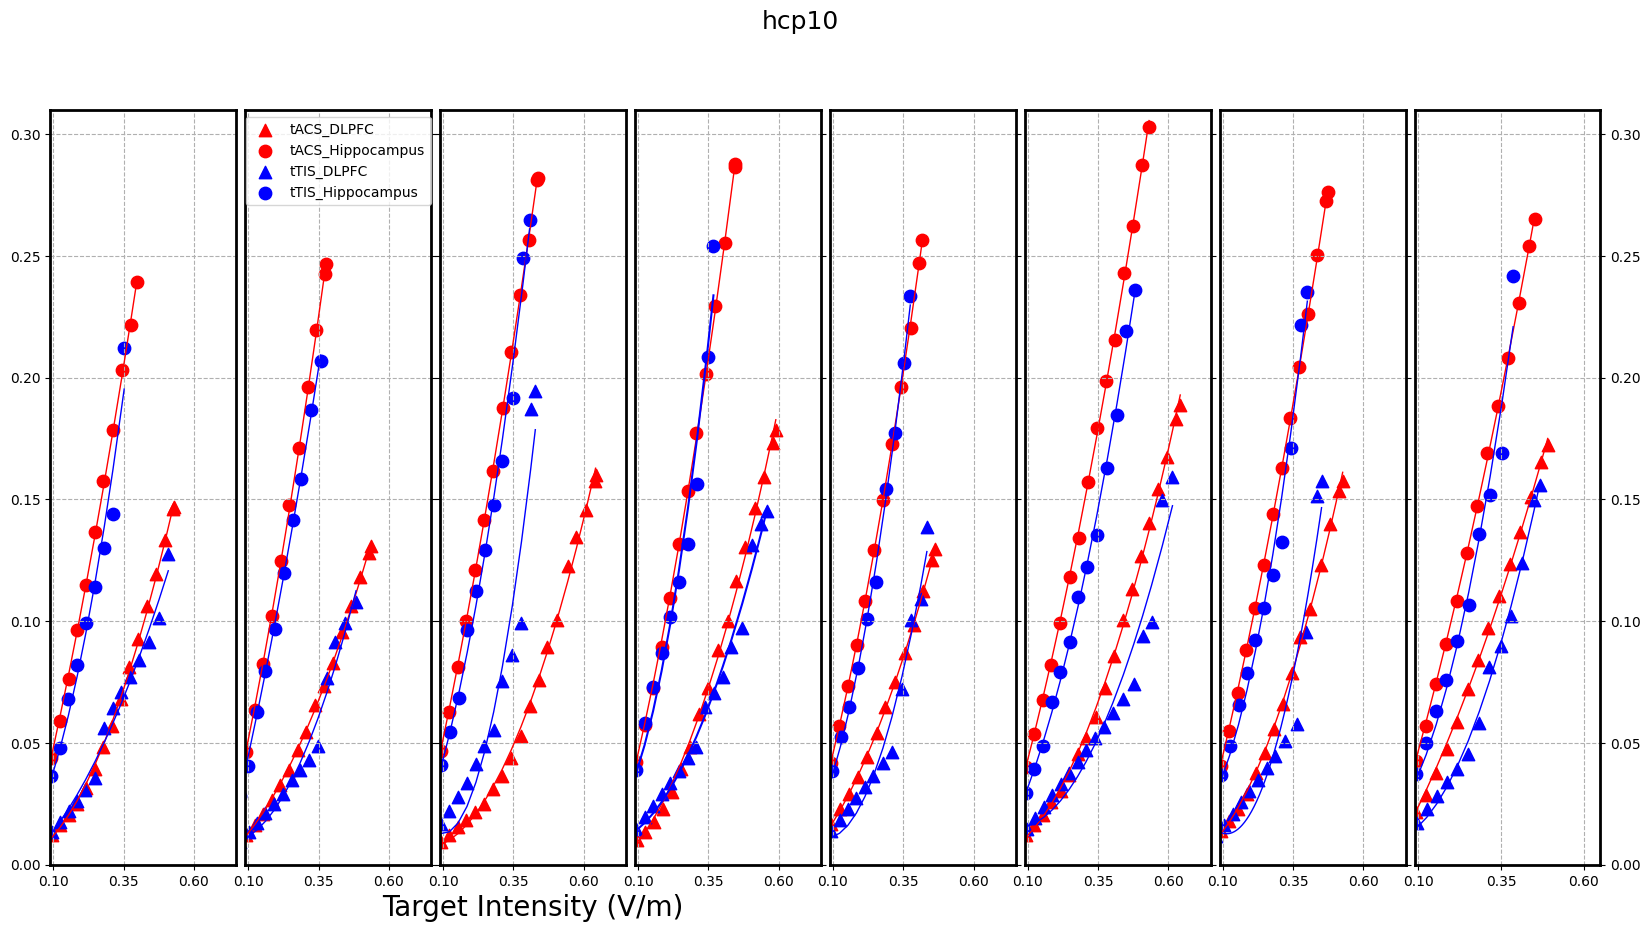

In [12]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np

GAP =0.03
MODEL ='hcp2'

import matplotlib.pyplot as plot
import numpy as np
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index
            
            
        
#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(8,1,figsize=(20,10 ), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(182)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='tTIS_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='tTIS_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='upper center', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(184)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# data = interp(data,10)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.01)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,10)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.03)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,10)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.03)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')



# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# data = interp(data,10)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.01)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(183)
MODEL = 'hcp3'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_hcp3.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]


index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_hcp3.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"hcp3_ti_dlpfc.txt","r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt", "r")
#f2 = open(r"ObjV.csv", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.03)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp3.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.75, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)


plt.subplot(181)
MODEL = 'hcp1'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_hcp1.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_hcp1.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})

ax.yaxis.set_ticks_position('left')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.75, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.spines['bottom'].set_linewidth('2.0')


plt.subplot(186)
MODEL ='hcp8'
ax.yaxis.set_ticks_position('left')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.75, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(186)
MODEL ='hcp7'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]

index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
data = data[:-25]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')


plt.subplot(187)
MODEL ='hcp8'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]

index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
temp = np.arange(np.min(1/data[index,0]),np.max(1/data[index,0]),0.001)
plt.plot(temp,p(temp),c='b',linewidth = 1)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='gold',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')



plt.subplot(185)
MODEL ='hcp6'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

#/mnt/zfs-pool/tes/ti/mopso
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/intensity_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.75, 0.25)
plt.xticks(np.arange(0.1, 0.71, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')


plt.subplot(188)
MODEL ='hcp10'

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_dlpfc_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/1105pareto_fitness_hippo_"+MODEL+".txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
data = interp(data,10)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=80,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

#ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

# # 设置图像的边框粗细程度
t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()
#plt.savefig("result1106.pdf")
#不显示y轴
